### Lec1

In [110]:
import numpy as np
import pandas as pd

In [130]:
%matplotlib inline 
import matplotlib.pyplot as plt

#### データの読み込み

dtype: "=" ではなく ":" を使用する。

In [112]:
salary = pd.read_csv("./data/salary.csv", 
    encoding="utf-8", 
    dtype={'salary':'int', 'year':'int', 'work': 'int', 'absent': 'int','license': 'int'})

#### データ情報の表示

In [113]:
salary.head()

,salary,year,work,absent,license
0,245803,5,144,6,0
1,241428,1,234,5,1
2,272966,6,240,5,1
3,326961,19,207,4,1
4,240608,1,189,5,1


In [114]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   salary   100 non-null    int64
 1   year     100 non-null    int64
 2   work     100 non-null    int64
 3   absent   100 non-null    int64
 4   license  100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [115]:
salary.index

RangeIndex(start=0, stop=100, step=1)

In [116]:
salary.columns

Index(['salary', 'year', 'work', 'absent', 'license'], dtype='object')

In [117]:
salary.shape

(100, 5)

In [118]:
salary.describe()

,salary,year,work,absent,license
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,267767.940000,6.840000,202.99000,5.000000,0.480000
std,21924.853722,4.066915,30.77205,1.128152,0.502117
min,224399.000000,0.000000,108.00000,3.000000,0.000000
25%,251697.750000,4.000000,182.75000,4.000000,0.000000
50%,267123.500000,6.500000,207.50000,5.000000,0.000000
75%,278389.750000,9.000000,224.25000,6.000000,1.000000
max,335092.000000,19.000000,263.00000,8.000000,1.000000


#### 箱ひげ図の作成

In [119]:
import scipy.stats as st

<AxesSubplot: title={'center': 'salary'}, xlabel='license'>

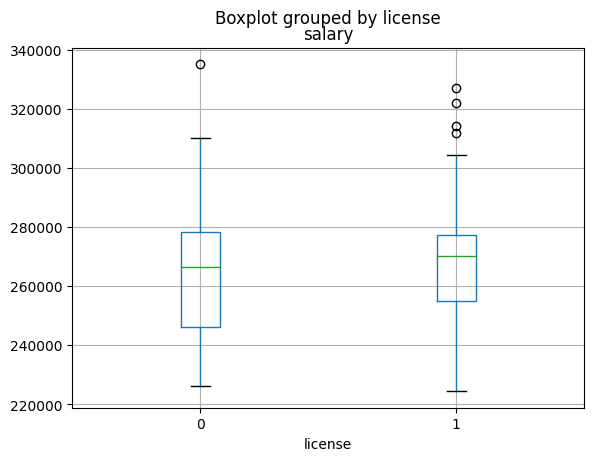

In [120]:
salary.boxplot(column = "salary", by = "license")

#### 母集団の差の検定

ハマったところ
1. 等号とブール演算の違いを意識できていなかった
2. licenseの変数がintかdoubuleによって等号が思ったように機能しなかったこと
1.00000...と1

In [121]:
salary_0 = salary[salary["license"] == False]["salary"]
salary_1 = salary[salary["license"] == True]["salary"]

In [122]:
t, p = st.ttest_ind(salary_0, salary_1, equal_var=True)
print(t, p)

-0.8774791090929795 0.38237256650526297


#### 重回帰分析

In [139]:
import seaborn as sns
from sklearn.linear_model import LinearRegression as lp

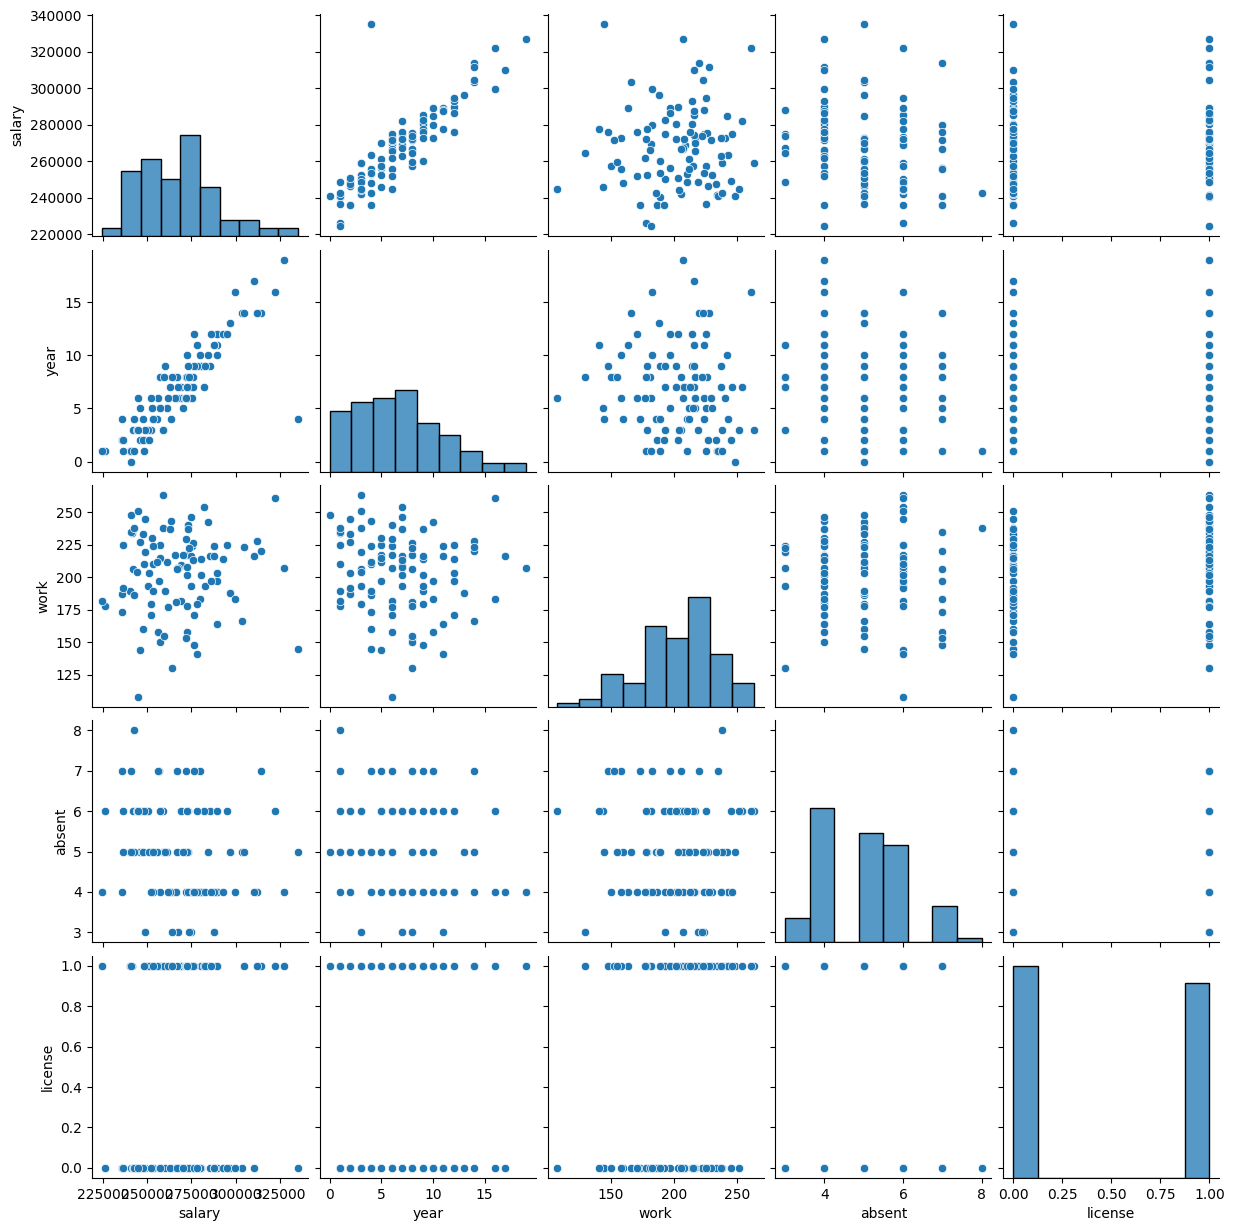

In [136]:
sns.pairplot(salary)

In [ ]:
y = salary["salary"]
x1 = salary["year"]
x2 = salary["work"]
x3 = salary["absent"]
x4 = salary["license"]

In [140]:
# 目的変数(Y)
Y = np.array(salary['salary'])
 
# 説明変数(X)
col_name = ['year', 'work', 'absent', 'license']
X = np.array(salary[col_name])

In [141]:
model = lp()
model.fit(X, Y)

LinearRegression()

In [142]:
# 回帰係数
coef = pd.DataFrame({"col_name":np.array(col_name),"coefficient":model.coef_}).sort_values(by='coefficient')

# 結果
print("【回帰係数】", coef)
print("【切片】:", model.intercept_)
print("【決定係数(訓練)】:", model.score(X, Y))
print("【決定係数(テスト)】:", model.score(X, Y))

【回帰係数】   col_name  coefficient
1     work    93.074038
2   absent   262.713726
3  license  3977.655489
0     year  4761.563696
【切片】: 213082.90212521737
【決定係数(訓練)】: 0.774588302561404
【決定係数(テスト)】: 0.774588302561404
